In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score

import sys
sys.path.insert(0, "..")   
from src.gdkm import GeneralizedDoubleKMeans, generalized_double_kmeans, get_bicluster_structure
from sklearn.datasets import make_checkerboard
from src.utils import reorder_data
from src.plot_util import plot_with_cluster_boundaries_from_model


ImportError: cannot import name 'get_bicluster_structure' from 'src.gdkm' (/Users/yvesgreatti/github/kaggle_favorita_grocery_sales_forecasting/notebook/../src/gdkm.py)

In [ ]:
%load_ext autoreload
%autoreload 2

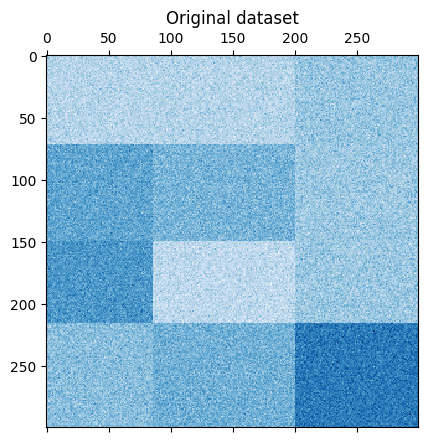

In [ ]:
n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10, shuffle=False, random_state=42
)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")
_ = plt.show()

In [ ]:
data.shape

(300, 300)

In [31]:

# Creating lists of shuffled row and column indices
rng = np.random.RandomState(0)
row_idx_shuffled = rng.permutation(data.shape[0])
col_idx_shuffled = rng.permutation(data.shape[1])

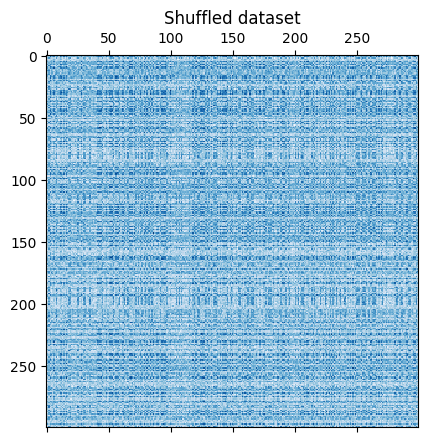

In [32]:
data = data[row_idx_shuffled][:, col_idx_shuffled]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")
_ = plt.show()

In [33]:

sc_model = SpectralBiclustering(n_clusters=n_clusters, method="log", random_state=0)
sc_model.fit(data)

# Compute the similarity of two sets of biclusters
score = consensus_score(
    sc_model.biclusters_, (rows[:, row_idx_shuffled], columns[:, col_idx_shuffled])
)
print(f"consensus score: {score:.1f}")

consensus score: 0.1


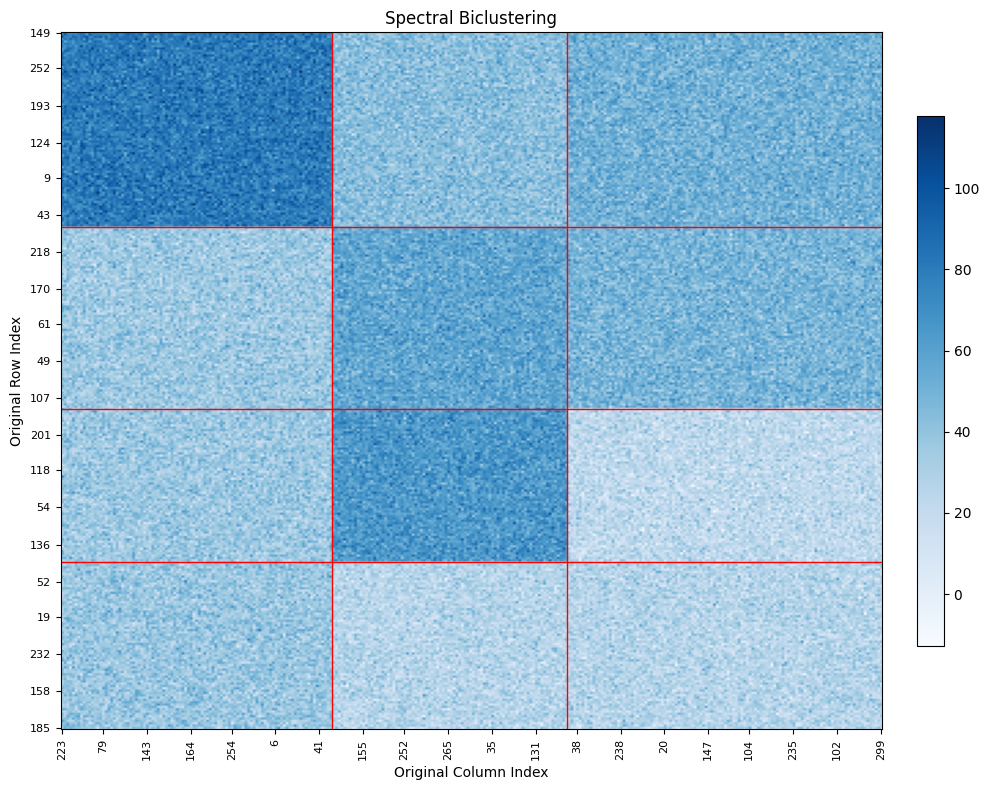

In [34]:
plot_with_cluster_boundaries_from_model(data, sc_model, title="Spectral Biclustering")

In [43]:
gdkm_model = GeneralizedDoubleKMeans(
        n_row_clusters=3,
        n_col_clusters_list=[4]*3,
        max_iter=100,
        tol=1e-4,
        random_state=0,
    )
gdkm_model.fit(data)
print(gdkm_model.biclusters_[0].shape)
# Compute the similarity of two sets of biclusters
score = consensus_score(
    gdkm_model.biclusters_, (rows[:, row_idx_shuffled], columns[:, col_idx_shuffled])
)
print(f"consensus score: {score:.1f}")


Iteration 0: Loss=3.10e+07, max X=117.79378997651986, max cp=46.28846640169894
Iteration 1: Loss=1.95e+07, max X=117.79378997651986, max cp=106.71238559252657
Iteration 2: Loss=1.50e+07, max X=117.79378997651986, max cp=80.67261100025824
Iteration 3: Loss=1.42e+07, max X=117.79378997651986, max cp=80.65474976818129
Iteration 4: Loss=1.41e+07, max X=117.79378997651986, max cp=80.65474976818129
Iteration 5: Loss=1.39e+07, max X=117.79378997651986, max cp=80.65474976818129
Iteration 6: Loss=1.35e+07, max X=117.79378997651986, max cp=80.65474976818129
Iteration 7: Loss=1.35e+07, max X=117.79378997651986, max cp=80.65474976818129
Iteration 8: Loss=1.35e+07, max X=117.79378997651986, max cp=80.65474976818129
Iteration 9: Loss=1.35e+07, max X=117.79378997651986, max cp=80.65474976818129
Iteration 10: Loss=1.35e+07, max X=117.79378997651986, max cp=80.65474976818129
Iteration 11: Loss=1.35e+07, max X=117.79378997651986, max cp=80.65474976818129
Iteration 12: Loss=1.35e+07, max X=117.7937899765

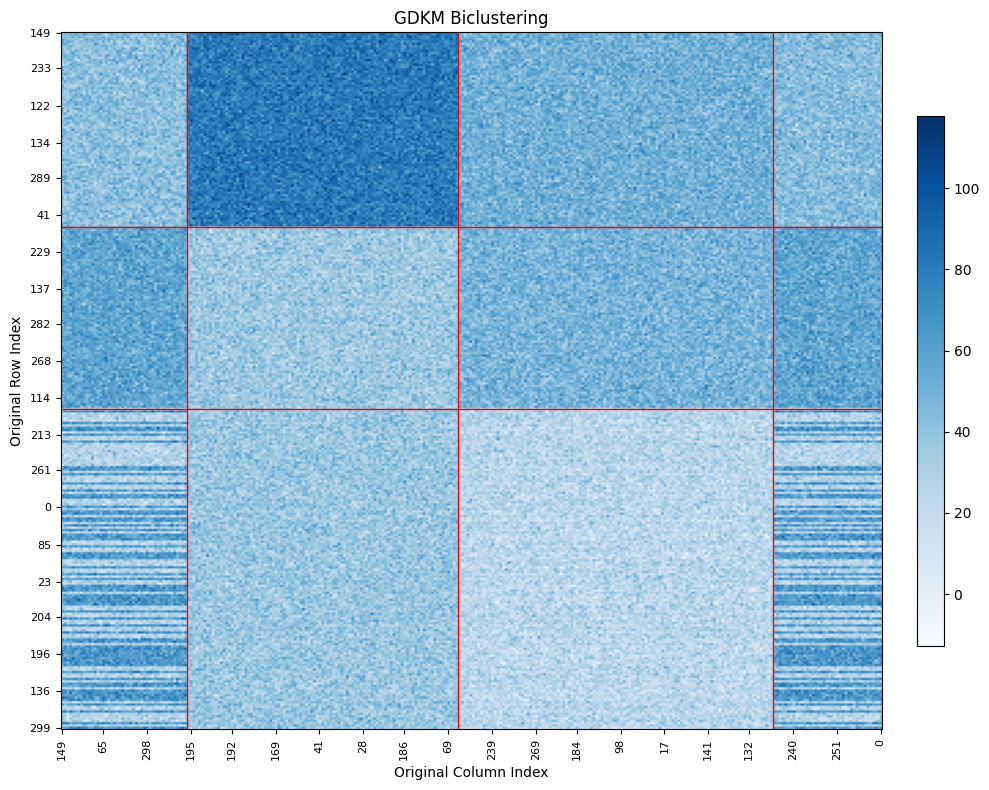

In [44]:
plot_with_cluster_boundaries_from_model(data, gdkm_model, title="GDKM Biclustering")

Text(0, 0.5, 'Count')

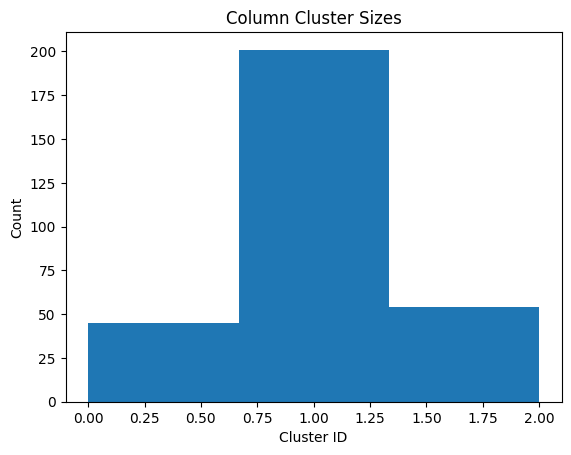

In [14]:
import matplotlib.pyplot as plt
_, col_labels = gdkm_model.row_labels_, gdkm_model.column_labels_
plt.hist(col_labels, bins=np.max(col_labels)+1)
plt.title("Column Cluster Sizes")
plt.xlabel("Cluster ID")
plt.ylabel("Count")
